<a href="https://colab.research.google.com/github/VarshaChaudhary13/30DaysofDSA/blob/main/labfile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gaussian

Value of Gaussian at x=[0 0]: 0.0163


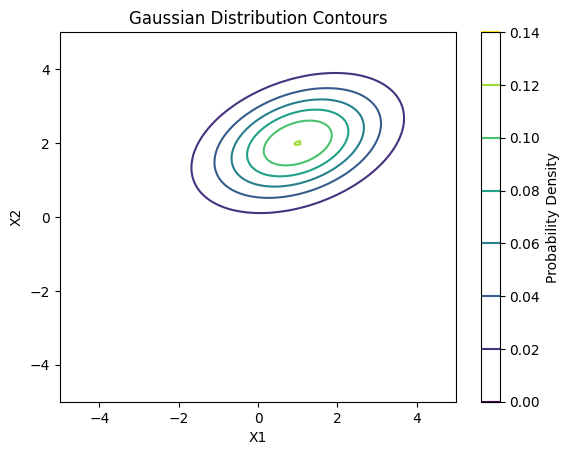

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def gaussian_pdf(x, mean, covariance):
    """
    Compute the value of the Gaussian probability density function at vector x.

    Parameters:
    x (numpy.ndarray): Input vector at which to evaluate the Gaussian function.
    mean (numpy.ndarray): Mean vector (m) of the Gaussian distribution.
    covariance (numpy.ndarray): Covariance matrix (S) of the Gaussian distribution.

    Returns:
    pdf_value (float): Value of the Gaussian probability density function at x.
    """
    # Calculate the probability density function value
    pdf_value = multivariate_normal.pdf(x, mean=mean, cov=covariance)
    return pdf_value

def plot_gaussian_contours(mean, covariance, xlim=(-5, 5), ylim=(-5, 5), num_points=100):
    """
    Plot the contours of the Gaussian distribution defined by mean and covariance.

    Parameters:
    mean (numpy.ndarray): Mean vector (m) of the Gaussian distribution.
    covariance (numpy.ndarray): Covariance matrix (S) of the Gaussian distribution.
    xlim (tuple): Tuple specifying the x-axis limits for plotting.
    ylim (tuple): Tuple specifying the y-axis limits for plotting.
    num_points (int): Number of points along each axis for creating the meshgrid.

    Returns:
    None (plots the Gaussian contours).
    """
    # Generate a grid of points to evaluate the Gaussian distribution
    x = np.linspace(xlim[0], xlim[1], num_points)
    y = np.linspace(ylim[0], ylim[1], num_points)
    X, Y = np.meshgrid(x, y)
    points = np.vstack([X.ravel(), Y.ravel()]).T

    # Evaluate the Gaussian probability density function at each point
    Z = multivariate_normal.pdf(points, mean=mean, cov=covariance)
    Z = Z.reshape(X.shape)

    # Plot contours of the Gaussian distribution
    plt.contour(X, Y, Z, cmap='viridis')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Gaussian Distribution Contours')
    plt.colorbar(label='Probability Density')
    plt.show()

# Example usage:
# Define mean vector and covariance matrix
mean = np.array([1, 2])
covariance = np.array([[2, 0.5], [0.5, 1]])

# Evaluate the Gaussian function at a specific point
x = np.array([0, 0])
pdf_value = gaussian_pdf(x, mean, covariance)
print(f"Value of Gaussian at x={x}: {pdf_value:.4f}")

# Plot contours of the Gaussian distribution
plot_gaussian_contours(mean, covariance)


classifier

In [ ]:
import numpy as np
from scipy.stats import multivariate_normal

def bayesian_classifier(mean_vectors, covariance_matrices, prior_probs, X):
    """
    Perform classification using the Bayesian classification rule.

    Parameters:
    mean_vectors (list of numpy.ndarray): List of mean vectors for each class, each shape (l,).
    covariance_matrices (list of numpy.ndarray): List of covariance matrices for each class, each shape (l, l).
    prior_probs (list or numpy.ndarray): A priori probabilities of the c classes.
    X (numpy.ndarray): Input data matrix of shape (l, N).
                       Each column represents a vector to be classified.

    Returns:
    predicted_classes (numpy.ndarray): Predicted class labels for vectors in X, shape (N,).
    """
    # Number of classes
    c = len(mean_vectors)

    # Number of samples
    N = X.shape[1]

    # Initialize predicted class labels array
    predicted_classes = np.zeros(N, dtype=int)

    for i in range(N):
        x = X[:, i]

        # Initialize list to store posterior probabilities for each class
        posterior_probs = []

        for j in range(c):
            mean = mean_vectors[j]
            cov = covariance_matrices[j]

            # Compute class conditional density (likelihood) for the vector x
            likelihood = multivariate_normal.pdf(x, mean=mean, cov=cov)

            # Calculate posterior probability using Bayes' rule
            posterior_prob = likelihood * prior_probs[j]

            # Store the posterior probability
            posterior_probs.append(posterior_prob)

        # Assign the vector to the class with the highest posterior probability
        predicted_classes[i] = np.argmax(posterior_probs)

    return predicted_classes

# Example usage:
# Define mean vectors, covariance matrices, prior probabilities, and generate sample data matrix X
mean_vectors = [np.array([1, 2]), np.array([4, 5]), np.array([0, 0])]
covariance_matrices = [np.array([[1, 0.5], [0.5, 2]]), np.array([[2, 0.3], [0.3, 1]]), np.array([[3, 0], [0, 4]])]
prior_probs = [0.3, 0.4, 0.3]  # A priori probabilities of the classes

# Generate sample data matrix X
np.random.seed(0)
l, N = 2, 100
X = np.random.randn(l, N)

# Apply Bayesian classifier
predicted_classes = bayesian_classifier(mean_vectors, covariance_matrices, prior_probs, X)

print("Predicted classes for X:", predicted_classes)


Predicted classes for X: [0 2 2 0 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 2 2 2 0 2 2 2 2 0 0 0 2 0 2 2 2 0 0
 2 2 2 2 2 2 0 0 0 2 0 2 2 2 0 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 0 0 0 2
 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 0 2 2 0 2 0 0 0 0]


Mahalanobis distance classifier

In [ ]:
import numpy as np

def mahalanobis_distance(x, mean_vector, covariance_matrix):
    """
    Compute the Mahalanobis distance between a vector x and a multivariate
    Gaussian distribution characterized by mean_vector and covariance_matrix.

    Parameters:
    x (numpy.ndarray): Input vector of shape (l,).
    mean_vector (numpy.ndarray): Mean vector of the Gaussian distribution, shape (l,).
    covariance_matrix (numpy.ndarray): Covariance matrix of the Gaussian distribution, shape (l, l).

    Returns:
    distance (float): Mahalanobis distance between x and the distribution.
    """
    # Ensure inputs are numpy arrays
    x = np.array(x)
    mean_vector = np.array(mean_vector)
    covariance_matrix = np.array(covariance_matrix)

    # Calculate the difference between x and the mean vector
    diff = x - mean_vector

    # Calculate the Mahalanobis distance
    inv_cov_matrix = np.linalg.inv(covariance_matrix)
    distance = np.sqrt(np.dot(np.dot(diff.T, inv_cov_matrix), diff))

    return distance

def min_mahalanobis_classifier(mean_vectors, covariance_matrices, X):
    """
    Perform classification using the Minimum Mahalanobis Distance Classifier.

    Parameters:
    mean_vectors (list of numpy.ndarray): List of mean vectors for each class, each shape (l,).
    covariance_matrices (list of numpy.ndarray): List of covariance matrices for each class, each shape (l, l).
    X (numpy.ndarray): Input data matrix of shape (l, N).
                       Each column represents a vector to be classified.

    Returns:
    predicted_classes (numpy.ndarray): Predicted class labels for vectors in X, shape (N,).
    """
    # Number of classes
    c = len(mean_vectors)

    # Number of samples
    N = X.shape[1]

    # Initialize predicted class labels array
    predicted_classes = np.zeros(N, dtype=int)

    for i in range(N):
        x = X[:, i]
        min_distance = float('inf')
        predicted_class = -1

        # Calculate Mahalanobis distance for each class
        for j in range(c):
            distance = mahalanobis_distance(x, mean_vectors[j], covariance_matrices[j])

            # Update predicted class if a closer class is found
            if distance < min_distance:
                min_distance = distance
                predicted_class = j

        # Assign the predicted class label to the vector
        predicted_classes[i] = predicted_class

    return predicted_classes

# Example usage:
# Define mean vectors and covariance matrices for each class
mean_vectors = [np.array([1, 2]), np.array([4, 5]), np.array([0, 0])]
covariance_matrices = [np.array([[1, 0.5], [0.5, 2]]), np.array([[2, 0.3], [0.3, 1]]), np.array([[3, 0], [0, 4]])]

# Generate sample data matrix X
np.random.seed(0)
l, N = 2, 100
X = np.random.randn(l, N)

# Apply Minimum Mahalanobis Distance Classifier
predicted_classes = min_mahalanobis_classifier(mean_vectors, covariance_matrices, X)

print("Predicted classes for X:", predicted_classes)

Predicted classes for X: [0 2 2 2 2 2 2 2 2 0 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0]


kNN

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

def knn_classifier(Z, Z_classes, k, X):
    """
    Perform k-nearest neighbors classification on new data X.

    Parameters:
    Z (numpy.ndarray): Training data matrix of shape (l, N1).
                       Each column represents a vector from the training set.
    Z_classes (numpy.ndarray): Class labels corresponding to vectors in Z, of shape (N1,).
    k (int): Number of nearest neighbors to consider.
    X (numpy.ndarray): New data matrix of shape (l, N).
                       Each column represents a vector from the test set.

    Returns:
    predicted_classes (numpy.ndarray): Predicted class labels for vectors in X, of shape (N,).
    """
    # Create a k-nearest neighbors classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier using the training data (Z) and their corresponding classes
    knn.fit(Z.T, Z_classes)

    # Predict classes for the new data (X)
    predicted_classes = knn.predict(X.T)

    return predicted_classes

# Example usage:
# Generate synthetic data
np.random.seed(0)
l, N1, N = 2, 100, 50  # l-dimensional vectors, N1 training samples, N test samples
Z = np.random.randn(l, N1)  # Training data matrix
Z_classes = np.random.randint(0, 2, size=N1)  # Training classes (binary)
X = np.random.randn(l, N)  # Test data matrix

# Specify the value of k (number of nearest neighbors)
k = 5

# Apply k-nearest neighbors classifier
predicted_classes = knn_classifier(Z, Z_classes, k, X)

print("Predicted classes for X:", predicted_classes)


Predicted classes for X: [1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1
 1 0 0 0 0 0 1 0 1 0 1 1 1]


CLASSIFICATION ERROR

In [ ]:
import numpy as np

def classification_error(true_labels, predicted_labels):
    """
    Calculate the classification error between true labels and predicted labels.

    Parameters:
    true_labels (numpy.ndarray): True class labels vector of shape (N,).
    predicted_labels (numpy.ndarray): Predicted class labels vector of shape (N,).

    Returns:
    error_percentage (float): Percentage of places where true and predicted labels differ.
    """
    # Check if the input vectors have the same shape
    assert true_labels.shape == predicted_labels.shape, "Input vectors must have the same shape."

    N = true_labels.shape[0]

    # Count number of places where true and predicted labels differ
    num_errors = np.sum(true_labels != predicted_labels)

    # Calculate classification error percentage
    error_percentage = (num_errors / N) * 100.0

    return error_percentage

# Example usage:
# Generate example true and predicted labels
np.random.seed(0)
N = 100
true_labels = np.random.randint(0, 2, size=N)  # Random binary true labels (0 or 1)
predicted_labels = np.random.randint(0, 2, size=N)  # Random binary predicted labels (0 or 1)

# Calculate classification error
error_percentage = classification_error(true_labels, predicted_labels)

print("True labels:", true_labels)
print("Predicted labels:", predicted_labels)
print(f"Classification Error: {error_percentage:.2f}%")


True labels: [0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0
 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0]
Predicted labels: [1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0
 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0]
Classification Error: 51.00%


PERCEPTRON

In [ ]:
import numpy as np

def perceptron(X, y, w_ini, max_iterations=100):
    """
    Perform the perceptron learning algorithm.

    Parameters:
    X (numpy.ndarray): Input data matrix of shape (l, N).
    y (numpy.ndarray): Target labels vector of shape (N,).
                       Each element should be either -1 or +1.
    w_ini (numpy.ndarray): Initial weight vector of shape (l,).
    max_iterations (int): Maximum number of iterations (default=100).

    Returns:
    w_final (numpy.ndarray): Estimated weight vector after training.
    """
    l, N = X.shape
    w = w_ini.copy()  # Initialize weight vector

    for _ in range(max_iterations):
        converged = True  # Flag to check convergence within one iteration

        for i in range(N):
            xi = X[:, i]
            yi = y[i]

            # Check if the current example is misclassified
            if yi * np.dot(w, xi) <= 0:
                # Update the weight vector
                w = w + yi * xi
                converged = False  # Since an update was made, not converged

        if converged:
            break  # If no updates were made, perceptron has converged

    return w

# Example usage:
# Generate synthetic data
np.random.seed(0)
l, N = 2, 100
X = np.random.randn(l, N)
w_true = np.random.randn(l)  # True weight vector
y = np.sign(np.dot(w_true, X))  # True labels (+1 or -1)

# Initial weight vector
w_ini = np.random.randn(l)

# Apply perceptron algorithm
w_final = perceptron(X, y, w_ini)

print("True weight vector:", w_true)
print("Estimated weight vector:", w_final)


  PCA

In [ ]:
import numpy as np
def pca(X):
    # Center the data (subtract mean along each feature)
    mean_X = np.mean(X, axis=0)
    X_centered = X - mean_X

    # Compute covariance matrix
    cov_matrix = np.cov(X_centered, rowvar=False)  # Use rowvar=False because variables are columns

    # Compute eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Sort eigenvalues and eigenvectors in descending order
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    # Principal components (eigenvectors of the covariance matrix)
    components = eigenvectors.T  # Transpose to have each row as a principal component

    # Variance explained by each principal component
    variances = eigenvalues / np.sum(eigenvalues)  # Normalized variances

    return components, variances

def pca_performance(X, num_components=None):
    """
    Evaluate the performance of PCA on data matrix X by reducing dimensions.

    Parameters:
    X (numpy.ndarray): Input data matrix of shape (l, N).
    num_components (int or None): Number of principal components to retain.
                                  If None, retain all components.

    Returns:
    X_reduced (numpy.ndarray): Data matrix after dimension reduction using PCA.
    """
    # Perform PCA to get principal components and variances
    components, variances = pca(X)

    # Retain only the specified number of principal components
    if num_components is not None:
        components = components[:num_components]

    # Project the data onto the selected principal components
    X_reduced = np.dot(X, components.T)  # X * V^T, where V^T are the top principal components

    return X_reduced

# Example usage:
# Generate some random data matrix X with shape (l, N)
np.random.seed(0)
l, N = 100, 5
X = np.random.randn(l, N)

# Apply PCA and evaluate performance
num_components = 2  # Number of principal components to retain
X_reduced = pca_performance(X, num_components=num_components)

# Print results
print("Original data shape:", X.shape)
print("Reduced data shape (after PCA):", X_reduced.shape)


Original data shape: (100, 5)
Reduced data shape (after PCA): (100, 2)
